In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
df = pd.read_csv('kingcountysales.csv')
df.head()

,Unnamed: 0,sale_id,pinx,sale_date,sale_price,sale_nbr,sale_warning,join_status,join_year,latitude,...,view_olympics,view_cascades,view_territorial,view_skyline,view_sound,view_lakewash,view_lakesamm,view_otherwater,view_other,submarket
0,1,1999..144,..2734100475,1999-01-05,150000,1,,demo,1999,47.544359,...,0,0,0,0,0,0,0,0,0,E
1,2,1999..258,..1535200725,1999-01-05,235000,1,,demo,1999,47.421247,...,0,0,2,0,0,0,0,0,0,H
2,3,1999..331,..6028000255,1999-01-04,293000,1,,demo,1999,47.572103,...,0,0,0,0,0,0,0,0,0,R
3,4,1999..660,..6145600690,1999-01-08,164000,1,,demo,1999,47.703824,...,0,0,0,0,0,0,0,0,0,B
4,5,1999..775,..1939800005,1999-01-07,270000,1,,demo,1999,47.764482,...,0,0,0,0,0,0,0,0,0,Q


In [38]:
df.shape

(560219, 49)

In [39]:
df.size

27450731

In [40]:
df.columns

Index(['Unnamed: 0', 'sale_id', 'pinx', 'sale_date', 'sale_price', 'sale_nbr',
       'sale_warning', 'join_status', 'join_year', 'latitude', 'longitude',
       'area', 'city', 'zoning', 'subdivision', 'present_use', 'land_val',
       'imp_val', 'year_built', 'year_reno', 'sqft_lot', 'sqft', 'sqft_1',
       'sqft_fbsmt', 'grade', 'fbsmt_grade', 'condition', 'stories', 'beds',
       'bath_full', 'bath_3qtr', 'bath_half', 'garb_sqft', 'gara_sqft', 'wfnt',
       'golf', 'greenbelt', 'noise_traffic', 'view_rainier', 'view_olympics',
       'view_cascades', 'view_territorial', 'view_skyline', 'view_sound',
       'view_lakewash', 'view_lakesamm', 'view_otherwater', 'view_other',
       'submarket'],
      dtype='object')

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560219 entries, 0 to 560218
Data columns (total 49 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        560219 non-null  int64  
 1   sale_id           560219 non-null  object 
 2   pinx              560219 non-null  object 
 3   sale_date         560219 non-null  object 
 4   sale_price        560219 non-null  int64  
 5   sale_nbr          560219 non-null  int64  
 6   sale_warning      560219 non-null  object 
 7   join_status       560219 non-null  object 
 8   join_year         560219 non-null  int64  
 9   latitude          560219 non-null  float64
 10  longitude         560219 non-null  float64
 11  area              560219 non-null  int64  
 12  city              560219 non-null  object 
 13  zoning            560219 non-null  object 
 14  subdivision       510572 non-null  object 
 15  present_use       560219 non-null  int64  
 16  land_val          56

In [42]:
df.isna().sum()

Unnamed: 0              0
sale_id                 0
pinx                    0
sale_date               0
sale_price              0
sale_nbr                0
sale_warning            0
join_status             0
join_year               0
latitude                0
longitude               0
area                    0
city                    0
zoning                  0
subdivision         49647
present_use             0
land_val                0
imp_val                 0
year_built              0
year_reno               0
sqft_lot                0
sqft                    0
sqft_1                  0
sqft_fbsmt              0
grade                   0
fbsmt_grade             0
condition               0
stories                 0
beds                    0
bath_full               0
bath_3qtr               0
bath_half               0
garb_sqft               0
gara_sqft               0
wfnt                    0
golf                    0
greenbelt               0
noise_traffic           0
view_rainier

We can safely drop subdivision due to its high number of null values

In [43]:
df = df.drop(columns=[
    "subdivision",
    "Unnamed: 0"
])

In [44]:
df.columns

Index(['sale_id', 'pinx', 'sale_date', 'sale_price', 'sale_nbr',
       'sale_warning', 'join_status', 'join_year', 'latitude', 'longitude',
       'area', 'city', 'zoning', 'present_use', 'land_val', 'imp_val',
       'year_built', 'year_reno', 'sqft_lot', 'sqft', 'sqft_1', 'sqft_fbsmt',
       'grade', 'fbsmt_grade', 'condition', 'stories', 'beds', 'bath_full',
       'bath_3qtr', 'bath_half', 'garb_sqft', 'gara_sqft', 'wfnt', 'golf',
       'greenbelt', 'noise_traffic', 'view_rainier', 'view_olympics',
       'view_cascades', 'view_territorial', 'view_skyline', 'view_sound',
       'view_lakewash', 'view_lakesamm', 'view_otherwater', 'view_other',
       'submarket'],
      dtype='object')

In [45]:
df.isna().sum()

sale_id             0
pinx                0
sale_date           0
sale_price          0
sale_nbr            0
sale_warning        0
join_status         0
join_year           0
latitude            0
longitude           0
area                0
city                0
zoning              0
present_use         0
land_val            0
imp_val             0
year_built          0
year_reno           0
sqft_lot            0
sqft                0
sqft_1              0
sqft_fbsmt          0
grade               0
fbsmt_grade         0
condition           0
stories             0
beds                0
bath_full           0
bath_3qtr           0
bath_half           0
garb_sqft           0
gara_sqft           0
wfnt                0
golf                0
greenbelt           0
noise_traffic       0
view_rainier        0
view_olympics       0
view_cascades       0
view_territorial    0
view_skyline        0
view_sound          0
view_lakewash       0
view_lakesamm       0
view_otherwater     0
view_other

In [46]:
df[df.duplicated()]

,sale_id,pinx,sale_date,sale_price,sale_nbr,sale_warning,join_status,join_year,latitude,longitude,...,view_olympics,view_cascades,view_territorial,view_skyline,view_sound,view_lakewash,view_lakesamm,view_otherwater,view_other,submarket


In [47]:
df.duplicated().sum()

np.int64(0)

# <p style='color: red'>Correlation</p>

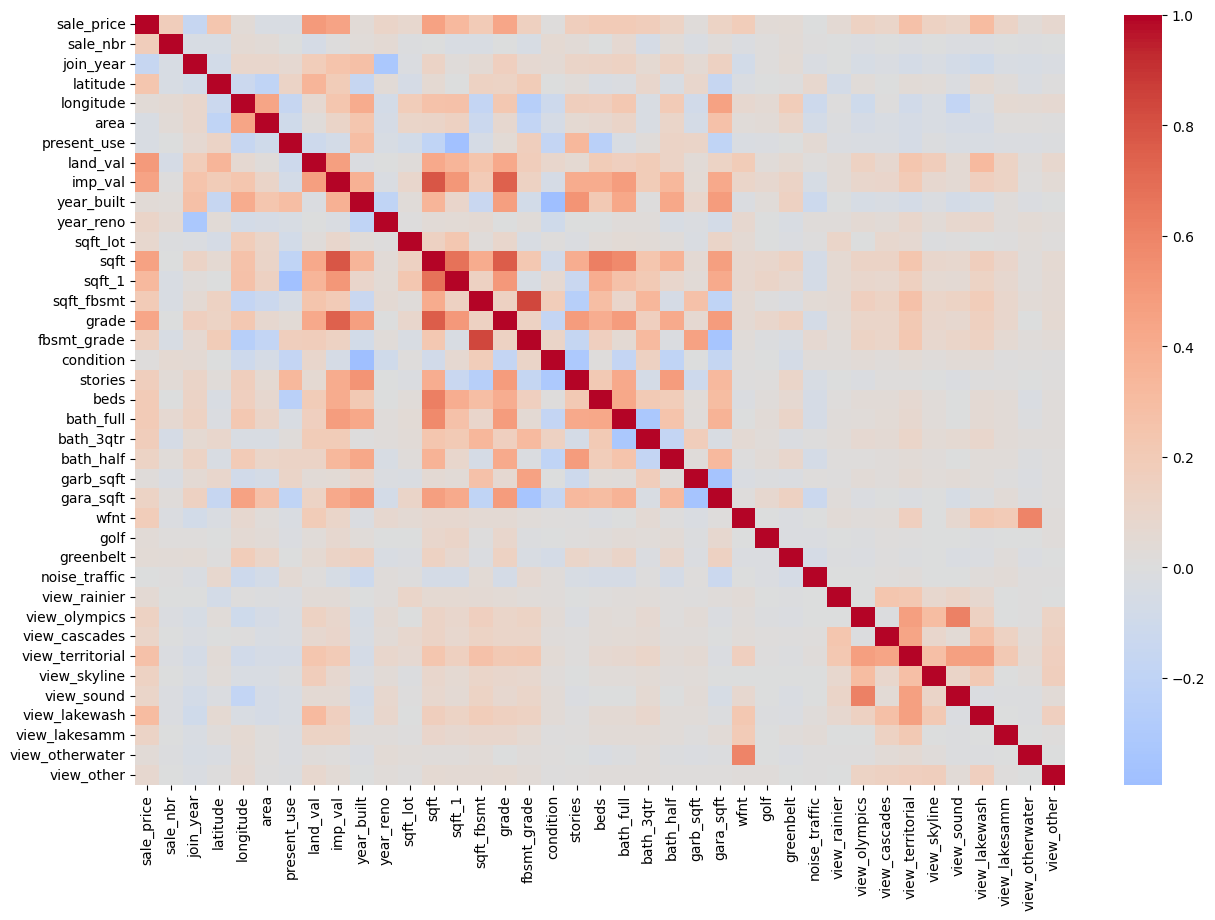

In [48]:
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, cmap="coolwarm", center=0)
plt.show()

## <p style='color: green'>We can see that there are hihgly correlated columns 
## <p style='color: green'>Now to see columns whose correlation coefficient is more than 0.6, strongly correlated and dropping them. </p>

In [55]:
corr_with_target = df.corr(numeric_only = True)['sale_price'].sort_values(ascending=False)
print(corr_with_target)

sale_price          1.000000
land_val            0.497982
sqft                0.451018
imp_val             0.446506
grade               0.437289
sqft_1              0.324006
view_lakewash       0.310266
view_territorial    0.266651
latitude            0.233542
bath_full           0.203469
beds                0.200535
sqft_fbsmt          0.199869
wfnt                0.186568
bath_3qtr           0.176945
sale_nbr            0.176651
stories             0.169915
fbsmt_grade         0.154304
view_olympics       0.138454
view_skyline        0.136674
bath_half           0.134116
gara_sqft           0.125607
view_lakesamm       0.118392
year_reno           0.117866
view_cascades       0.106456
view_sound          0.102567
sqft_lot            0.082548
view_other          0.072604
view_rainier        0.055912
greenbelt           0.042331
golf                0.039885
longitude           0.037468
year_built          0.035180
view_otherwater     0.032948
garb_sqft           0.020418
condition     

In [56]:
high_corr = corr_matrix[(corr_matrix >= 0.8) & (corr_matrix <1.0)]
print(high_corr.dropna(how="all", axis=0).dropna(how="all", axis=1))

             sqft_fbsmt  fbsmt_grade
sqft_fbsmt          NaN     0.831937
fbsmt_grade    0.831937          NaN


In [57]:
corr_matrix = df.corr(numeric_only=True).abs()  

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

to_drop = [column for column in upper.columns if any(upper[column] >= 0.8)]

print("Columns to drop due to high correlation (>0.6):")
print(to_drop)
df = df.drop(columns=to_drop)
print(f"Shape before: {df.shape}, after dropping: {df_reduced.shape}")

Columns to drop due to high correlation (>0.6):
['fbsmt_grade']
Shape before: (560219, 46), after dropping: (560219, 40)


### <p style='color: purple'> Highly correlated columns have been dropped

<br>
<hr>
<br>
<br>

# <p style='color: red'>Checking for skewness

In [58]:
df.skew(numeric_only= True)

sale_price           7.205433
sale_nbr             1.413077
join_year           -3.790884
latitude            -0.399276
longitude            0.840634
area                 0.029765
present_use          3.262347
land_val             7.960355
imp_val              4.381583
year_built          -0.504165
year_reno            5.503524
sqft_lot            52.358763
sqft                 1.358738
sqft_1               1.531051
sqft_fbsmt           1.600074
grade                0.677545
condition            0.885960
stories              0.366042
beds                 0.952949
bath_full            0.798976
bath_3qtr            1.182728
bath_half            0.391469
garb_sqft            3.168239
gara_sqft            0.885824
wfnt                 9.237267
golf                12.571231
greenbelt            5.212638
noise_traffic        2.933641
view_rainier        12.697188
view_olympics        7.360309
view_cascades        6.777200
view_territorial     3.345810
view_skyline        12.638159
view_sound

## <p style='color: green'>Transforming highly skewed values 

In [59]:
skewed_cols = df.select_dtypes(include=np.number).columns
skew_values = df[skewed_cols].skew()
high_skew_cols = skew_values[abs(skew_values) > 0.5].index.tolist()

print("Columns with skewness beyond ±0.5:")
print(high_skew_cols)

for col in high_skew_cols:
    df[col + "_log"] = np.log1p(df[col])  

df = df.drop(columns=high_skew_cols)

print("Shape after transforming and dropping skewed columns:", df.shape)

Columns with skewness beyond ±0.5:
['sale_price', 'sale_nbr', 'join_year', 'longitude', 'present_use', 'land_val', 'imp_val', 'year_built', 'year_reno', 'sqft_lot', 'sqft', 'sqft_1', 'sqft_fbsmt', 'grade', 'condition', 'beds', 'bath_full', 'bath_3qtr', 'garb_sqft', 'gara_sqft', 'wfnt', 'golf', 'greenbelt', 'noise_traffic', 'view_rainier', 'view_olympics', 'view_cascades', 'view_territorial', 'view_skyline', 'view_sound', 'view_lakewash', 'view_lakesamm', 'view_otherwater', 'view_other']


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


Shape after transforming and dropping skewed columns: (560219, 46)


In [60]:
print(df.isna().sum())

sale_id                      0
pinx                         0
sale_date                    0
sale_warning                 0
join_status                  0
latitude                     0
area                         0
city                         0
zoning                       0
stories                      0
bath_half                    0
submarket                    0
sale_price_log               0
sale_nbr_log                 0
join_year_log                0
longitude_log           560219
present_use_log              0
land_val_log                 0
imp_val_log                  0
year_built_log               0
year_reno_log                0
sqft_lot_log                 0
sqft_log                     0
sqft_1_log                   0
sqft_fbsmt_log               0
grade_log                    0
condition_log                0
beds_log                     0
bath_full_log                0
bath_3qtr_log                0
garb_sqft_log                0
gara_sqft_log                0
wfnt_log

In [61]:
df.describe()

,latitude,area,stories,bath_half,sale_price_log,sale_nbr_log,join_year_log,longitude_log,present_use_log,land_val_log,...,view_rainier_log,view_olympics_log,view_cascades_log,view_territorial_log,view_skyline_log,view_sound_log,view_lakewash_log,view_lakesamm_log,view_otherwater_log,view_other_log
count,560219.000000,560219.000000,560219.000000,560219.000000,560219.000000,560219.000000,560219.000000,0.0,560219.000000,560219.000000,...,560219.000000,560219.000000,560219.000000,560219.000000,560219.000000,560219.000000,560219.000000,560219.000000,560219.000000,560219.000000
mean,47.549997,48.284276,1.518671,0.495822,13.050158,1.001680,7.611676,NaN,1.273552,12.650350,...,0.009175,0.027435,0.030292,0.110458,0.009786,0.027917,0.029245,0.007375,0.009976,0.007258
std,0.142045,26.587456,0.520974,0.527231,0.621062,0.330751,0.002668,NaN,0.602693,1.250922,...,0.107908,0.184450,0.190495,0.356193,0.111046,0.179717,0.184263,0.095814,0.114826,0.093261
min,47.155203,1.000000,1.000000,0.000000,10.825641,0.693147,7.600902,NaN,1.098612,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.448233,26.000000,1.000000,0.000000,12.611374,0.693147,7.612337,NaN,1.098612,12.220966,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,47.563980,48.000000,1.500000,0.000000,12.999067,1.098612,7.612337,NaN,1.098612,12.736704,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,47.673188,71.000000,2.000000,1.000000,13.444448,1.098612,7.612337,NaN,1.098612,13.236586,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,47.777829,100.000000,4.500000,9.000000,17.281246,3.135494,7.612337,NaN,3.401197,17.152276,...,1.609438,1.609438,1.609438,1.609438,1.609438,1.609438,1.609438,1.609438,1.609438,1.609438


<br>
<hr>
<br>
<br>

# <p style='color: red'>Checking for irrelevant columns for the target

In [62]:
corr_with_target = df.corr(numeric_only = True)['sale_price_log'].sort_values(ascending=False)
print(corr_with_target)

sale_price_log          1.000000
grade_log               0.517509
sqft_log                0.489694
latitude                0.331384
land_val_log            0.293215
sqft_1_log              0.274055
stories                 0.261577
sale_nbr_log            0.256255
bath_full_log           0.248442
beds_log                0.246922
view_territorial_log    0.246631
view_lakewash_log       0.223811
imp_val_log             0.219523
bath_3qtr_log           0.183970
bath_half               0.172055
sqft_fbsmt_log          0.158464
view_olympics_log       0.141324
wfnt_log                0.128259
view_sound_log          0.120097
view_skyline_log        0.114431
year_reno_log           0.109963
sqft_lot_log            0.109034
view_cascades_log       0.108603
view_lakesamm_log       0.104893
year_built_log          0.097130
greenbelt_log           0.073889
view_other_log          0.072121
gara_sqft_log           0.066246
view_rainier_log        0.046074
golf_log                0.045608
view_other

In [63]:
irrelevant_cols = corr_with_target[abs(corr_with_target) < 0.1].index.tolist()
print(irrelevant_cols)
df = df.drop(columns=irrelevant_cols)

['year_built_log', 'greenbelt_log', 'view_other_log', 'gara_sqft_log', 'view_rainier_log', 'golf_log', 'view_otherwater_log', 'garb_sqft_log', 'condition_log', 'present_use_log', 'noise_traffic_log', 'area']


In [64]:
df = df.drop(columns=['longitude_log'])

In [65]:
corr_with_target = df.corr(numeric_only = True)['sale_price_log'].sort_values(ascending=False)
print(corr_with_target)

sale_price_log          1.000000
grade_log               0.517509
sqft_log                0.489694
latitude                0.331384
land_val_log            0.293215
sqft_1_log              0.274055
stories                 0.261577
sale_nbr_log            0.256255
bath_full_log           0.248442
beds_log                0.246922
view_territorial_log    0.246631
view_lakewash_log       0.223811
imp_val_log             0.219523
bath_3qtr_log           0.183970
bath_half               0.172055
sqft_fbsmt_log          0.158464
view_olympics_log       0.141324
wfnt_log                0.128259
view_sound_log          0.120097
view_skyline_log        0.114431
year_reno_log           0.109963
sqft_lot_log            0.109034
view_cascades_log       0.108603
view_lakesamm_log       0.104893
join_year_log          -0.115564
Name: sale_price_log, dtype: float64


## Now we have checked correlation between columns. Dropped highly correlated ones. 
## We have also tranformed highly skewed values.
## Dropped Irrelevant columns who have low correlation with sales_price_log
<br>
<hr>
<br>
<br>

In [66]:
# Check unique values in a column
df['sale_warning'].unique()

array(['   ', ' 34 ', ' 40 ', ' 41 ', ' 26 44 ', ' 26 ', ' 17 ', ' 10 ',
       ' 16 ', ' 29 ', ' 36 ', ' 45 ', ' 15 ', ' 10 36 ', ' 56 ',
       ' 3 26 ', ' 34 36 ', ' 35 ', ' 26 56 ', ' 10 15 16 ', ' 10 29 ',
       ' 10 29 34 56 ', ' 15 26 ', ' 10 26 ', ' 26 29 ', ' 15 16 ',
       ' 16 26 ', ' 10 15 26 ', ' 10 29 56 ', ' 10 16 ', ' 10 15 ',
       ' 15 56 ', ' 10 15 29 ', ' 15 16 26 ', ' 29 36 ', ' 58 ',
       ' 10 56 ', ' 29 45 ', ' 10 34 ', ' 15 36 ', ' 60 ', ' 15 29 ',
       ' 3 ', ' 36 56 ', ' 15 17 ', ' 10 15 16 26 ', ' 10 15 17 ',
       ' 10 16 26 ', ' 45 56 60 ', ' 10 15 36 ', ' 26 60 ', ' 10 60 ',
       ' 15 60 ', ' 15 34 ', ' 10 15 17 36 ', ' 15 35 ', ' 44 ',
       ' 26 41 ', ' 57 ', ' 10 15 56 ', ' 15 34 56 ', ' 15 26 29 ',
       ' 55 ', ' 10 29 36 ', ' 24 ', ' 10 15 36 56 ', ' 15 58 ',
       ' 10 26 56 ', ' 54 ', ' 4 ', ' 56 58 ', ' 15 55 ', ' 15 40 ',
       ' 15 92 ', ' 15 44 ', ' 4 15 ', ' 15 29 36 ', ' 3 15 ', ' 26 55 ',
       ' 15 29 56 ', ' 3 41 ', ' 42 ', 

In [67]:
df=df.replace({'   ':0})

In [68]:
df.head()

,sale_id,pinx,sale_date,sale_warning,join_status,latitude,city,zoning,stories,bath_half,...,bath_full_log,bath_3qtr_log,wfnt_log,view_olympics_log,view_cascades_log,view_territorial_log,view_skyline_log,view_sound_log,view_lakewash_log,view_lakesamm_log
0,1999..144,..2734100475,1999-01-05,0,demo,47.544359,SEATTLE,SF 5000,1.5,0,...,0.693147,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,1999..258,..1535200725,1999-01-05,0,demo,47.421247,KING COUNTY,RA2.5P,1.0,0,...,0.693147,0.000000,0.0,0.0,0.0,1.098612,0.0,0.0,0.0,0.0
2,1999..331,..6028000255,1999-01-04,0,demo,47.572103,KING COUNTY,R6,2.0,1,...,0.693147,0.693147,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,1999..660,..6145600690,1999-01-08,0,demo,47.703824,SEATTLE,SF 5000,1.0,0,...,0.693147,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,1999..775,..1939800005,1999-01-07,0,demo,47.764482,BOTHELL,R15 OP,1.5,1,...,0.693147,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [69]:
df.to_csv('processed_data.csv', index=False)

In [70]:
df.shape

(560219, 33)